# Simupy Example of Simple Pendulum

codes are from simupy's video at scipy from [youtube](https://www.youtube.com/watch?v=4s4drO7KYnw)

|block|diagram|
|---|---|
|![](block_diagram.png)|![](physics.png)|

NOTE: 

- see: [simupy #3](https://github.com/simupy/simupy/issues/3#issuecomment-465213376)
- we need sympy<15 now for simupy 1.00


In [1]:
#imports packages
import numpy as np, sympy as sp
import matplotlib.pyplot as plt
from simupy.systems.symbolic import DynamicalSystem, dynamicsymbols
from simupy.block_diagram import BlockDiagram
from simupy.array import Array, r_

def plot_x(result, label=''):
    plt.plot(result.t, result.y[:,0]*180/np.pi, label=label)
    plt.xlabel('time, s')
    plt.ylabel('position, degrees')

## define systems

In [2]:
x, v, u = dynamicsymbols('x v u')
l, m = sp.symbols('l m')

parameters = {l: 1, m: 1}

inertia = DynamicalSystem(
    state_equation = r_[v, u/(m*l**2)],
    state = r_[x,v],
    input_ = u,
    constants_values = parameters
)

g = sp.symbols('g')
parameters[g] = 9.8

gravity = DynamicalSystem(
    output_equation = -g*m*l*sp.sin(x),
    input_ = x,
    constants_values = parameters
)

## put them together

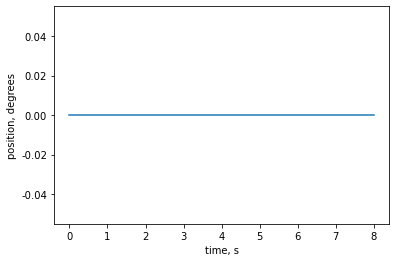

In [3]:
BD=BlockDiagram(inertia,gravity)
BD.connect(gravity,inertia)
BD.connect(inertia,gravity,outputs=[0])

plt.figure()
plot_x(BD.simulate(8),'first simulation')
plt.show()

## lift the pendulum, plot

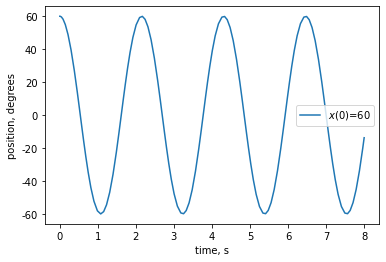

In [4]:
inertia.initial_condition=np.r_[60*np.pi/180,0]
plot_x(BD.simulate(8),'$x(0)$=60')
plt.legend()
plt.show()

## linearization

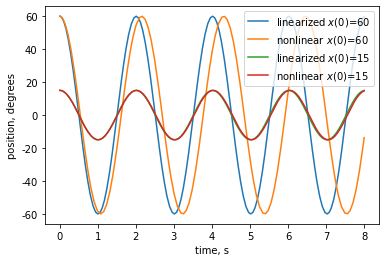

In [5]:
linearized_gravity = DynamicalSystem(
    output_equation = -g*x/l,
    input_ = x,
    constants_values = parameters
)

BD.add_system(linearized_gravity)
BD.connect(inertia,linearized_gravity,outputs=[0])

plt.figure()
for x0 in [60,15]:
    inertia.initial_condition[0]=x0*np.pi/180

    BD.connect(linearized_gravity,inertia)
    plot_x(BD.simulate(8),'linearized $x(0)$=%d' % x0)
    BD.connect(gravity,inertia)
    plot_x(BD.simulate(8),'nonlinear $x(0)$=%d' % x0)
plt.legend()
plt.show()
    

In [6]:
b = sp.symbols('b')
parameters[b] = 1.0

viscous_damping = DynamicalSystem(
    output_equation = -b*v,
    input_ = v,
    constants_values = parameters
)

from simupy.systems import LTISystem
sum1 = LTISystem(np.ones((1,5)))


pendulum = BlockDiagram(inertia, sum1, gravity, viscous_damping)
pendulum.connect(inertia, viscous_damping, outputs=[1])
pendulum.connect(sum1, inertia)
pendulum.connect(gravity, sum1, inputs=[0])
pendulum.connect(inertia, gravity, outputs=[0])
pendulum.connect(viscous_damping, sum1, inputs=[1])

plt.figure()
for bval in [0, 0.25, 0.5, 1.0]:
    parameters[b] = bval
    plot_x(pendulum.simulate(8), 'viscous damping $b$=%d' % bval)
plt.tight_layout()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 5)

<Figure size 432x288 with 0 Axes>